In [1]:
import pandas as pd

def read_data(file_path):
    print("Opening dataset: ", file_path)
    df = pd.read_csv(file_path)
    print("Dataframe shape: ", df.shape)
    print("Dataframe columns: ", df.columns, "\n")
    return df

In [3]:
#Open CSV files
true_data = read_data("archive/True.csv")
true_data['label'] = 1 # Add a label column to the true data

false_data = read_data("archive/Fake.csv")
false_data['label'] = 0 # Add a label column to the fake data

Opening dataset:  archive/True.csv
Dataframe shape:  (21417, 4)
Dataframe columns:  Index(['title', 'text', 'subject', 'date'], dtype='object') 

Opening dataset:  archive/Fake.csv
Dataframe shape:  (23481, 4)
Dataframe columns:  Index(['title', 'text', 'subject', 'date'], dtype='object') 



In [4]:
#Check if there is any null value
print("True data null values: ", true_data.isnull().sum())

#We actually don't need the date column for the classification
true_data.drop(columns=['date'])

True data null values:  title      0
text       0
subject    0
date       0
label      0
dtype: int64


,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1


In [5]:
#Check if there is any null value
print("False data null values: ", false_data.isnull().sum())

#The same goes for the false data
false_data.drop(columns=['date'])

False data null values:  title      0
text       0
subject    0
date       0
label      0
dtype: int64


,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


In [6]:
#Merge the two datasets
dataset = pd.concat([true_data, false_data], ignore_index=True)
print("Dataset merged, resulting shape: ", dataset.shape)

assert dataset.shape[0] == true_data.shape[0] + false_data.shape[0]
assert dataset.shape[1] == true_data.shape[1] == false_data.shape[1]

Dataset merged, resulting shape:  (44898, 5)


In [7]:
#Importing CountVectorizer to implement Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [8]:
#test train data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.text,dataset.label,test_size=.2,random_state=1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (35918,)
X_test shape:  (8980,)


In [9]:
#Fitting the classifier to the training data
cv_1=cv.fit_transform(X_train)
print(cv_1.shape)

(35918, 111868)


create a predictions_list 

In [24]:
predictions_list = []

In [25]:
#Using Random Forest to predict test values
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(cv_1,y_train)
y_pred_randomForest=rf.predict(cv.transform(X_test))

predictions_list.append(y_pred_randomForest)

In [26]:
#Computing the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_randomForest))

0.988641425389755


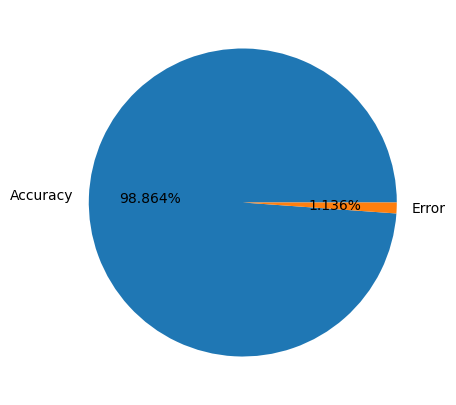

In [27]:
#Plotting the accuracy of the model
import matplotlib.pyplot as plt

def plot_accuracy(y_test,y_pred_randomForest):
    plt.figure(figsize=(5,5))
    plt.pie([accuracy_score(y_test,y_pred_randomForest),1-accuracy_score(y_test,y_pred_randomForest)],labels=['Accuracy','Error'],autopct='%1.3f%%')
    plt.show()

plot_accuracy(y_test,y_pred_randomForest)

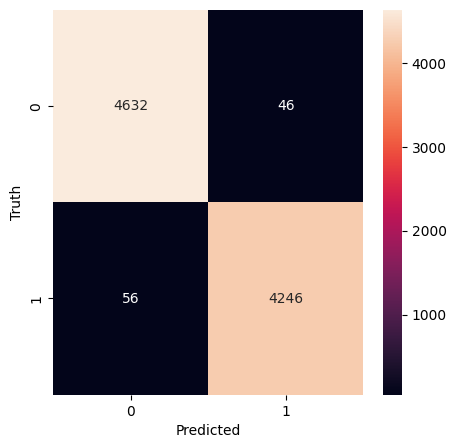

In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test,y_pred_randomForest):
    plt.figure(figsize=(5,5))
    cm=confusion_matrix(y_test,y_pred_randomForest)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

plot_confusion_matrix(y_test,y_pred_randomForest)

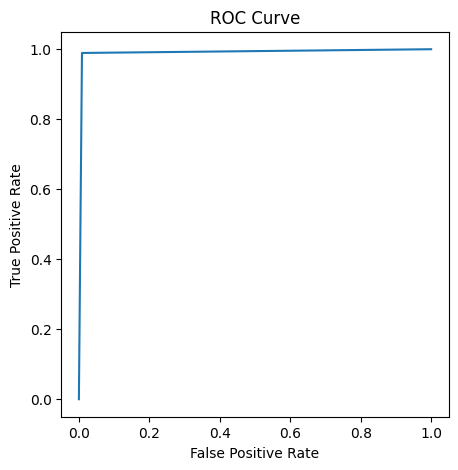

In [15]:
#Calculate the false positive rate, true positive rate
from sklearn.metrics import roc_curve

def plot_roc_curve(y_test,y_pred_randomForest):
    fpr,tpr,_=roc_curve(y_test,y_pred_randomForest)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

plot_roc_curve(y_test,y_pred_randomForest)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

count_vectorizer=CountVectorizer()

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(cv_1,y_train)
y_pred_knn=knn.predict(cv.transform(X_test))

predictions_list.append(y_pred_knn)

print(accuracy_score(y_test,y_pred_knn))

0.8965478841870824


In [17]:
#Input a news article to test the model

def test_news_input(text, classifier):
    news_cv = cv.transform([text])

    if classifier.predict(news_cv):
        print("The news is true")
        return 1
    else:
        print("The news is fake")
        return 0

test_news_input("Donald Trump", rf)

The news is fake


0

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(cv_1, y_train)
y_pred_log_reg = log_reg.predict(cv.transform(X_test))
predictions_list.append(y_pred_log_reg)

print("the accuracy of the LogisticRegression model is: ")
print(accuracy_score(y_test, y_pred_log_reg))

the accuracy of the LogisticRegression model is: 
0.9965478841870824


In [31]:
from sklearn.svm import SVC

Support_Vector_Machine  = SVC()

Support_Vector_Machine.fit(cv_1, y_train)
y_pred_Support_Vector_Machine = Support_Vector_Machine.predict(cv.transform(X_test))

print("the accuracy of the Support_Vector_Machine model is: ")

predictions_list.append(y_pred_Support_Vector_Machine)
print(accuracy_score(y_test, y_pred_log_reg))



the accuracy of the Support_Vector_Machine model is: 
0.9965478841870824


prova 1 per auc

In [21]:

#from sklearn.metrics import roc_auc_score

#auc = roc_auc_score(y_test, y_pred_log_reg)
#print(f"AUC: {auc}")

AUC: 0.9966025426593993


 ROC e AUC

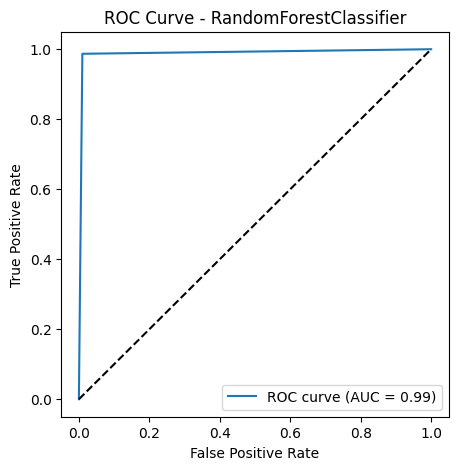

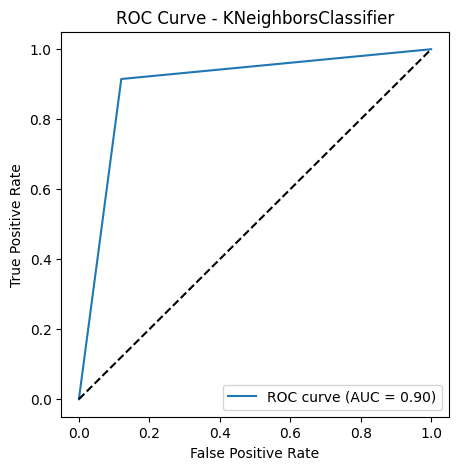

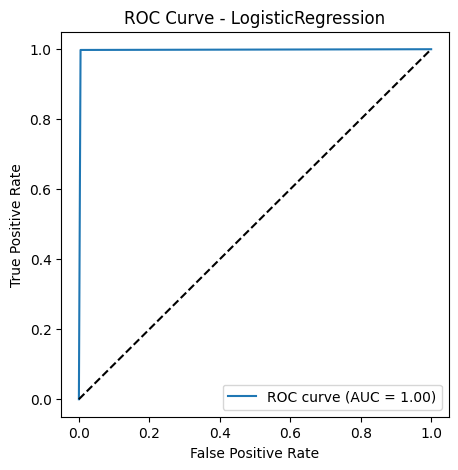

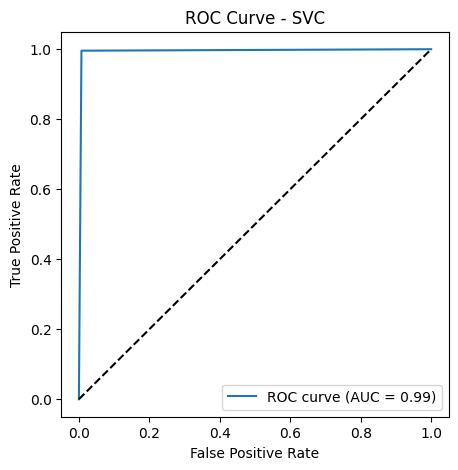

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

classifier_name_list = ['RandomForestClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'SVC']

def plot_roc_curve(y_test, y_pred, classifier_name):
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # Calculate the AUC
    auc = roc_auc_score(y_test, y_pred)
    # Plot the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + classifier_name)
    plt.legend(loc="lower right")
    plt.show()

for index, y_pred in enumerate(predictions_list):
    plot_roc_curve(y_test, y_pred, classifier_name_list[index])